 # Shallow Neural Network in TensorFlow

Build a shallow neural network to classify handwritten digits

#### Load dependencies

In [1]:
import tensorflow
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt


*Load Data*

In [2]:
(X_train, y_train), (X_valid , y_valid) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
y_train[:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

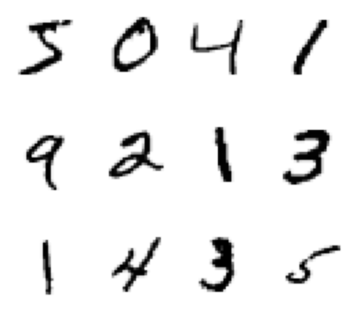

In [6]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [7]:
X_valid.shape

(10000, 28, 28)

In [8]:
y_valid.shape

(10000,)

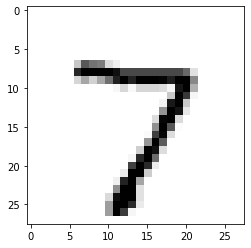

In [9]:
_= plt.imshow(X_valid[0], cmap= 'Greys')

In [10]:
X_valid[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [11]:
y_valid[0]

7

### Preprocess Data

In [12]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_valid = X_valid.reshape(10000, 784).astype('float32')

In [13]:
X_train /= 255
X_valid /= 255

In [14]:
X_valid[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [15]:
n_classes = 10
y_train = to_categorical(y_train, n_classes)
y_valid = to_categorical(y_valid, n_classes)

In [16]:
y_valid[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

### Design Neural Network Architecture

In [17]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [19]:
(64*784)

50176

In [20]:
(64*784)+64

50240

In [21]:
(10*64)+10

650

### Configure Model

In [22]:
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01), metrics=['accuracy'])

C:\conda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


### Train !

In [23]:
model.fit(X_train, y_train, batch_size=128, epochs=200, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/200
469/469 [==============================] - 4s 8ms/step - loss: 0.0931 - accuracy: 0.0930 - val_loss: 0.0920 - val_accuracy: 0.0909
Epoch 2/200
469/469 [==============================] - 3s 6ms/step - loss: 0.0915 - accuracy: 0.0896 - val_loss: 0.0910 - val_accuracy: 0.0981
Epoch 3/200
469/469 [==============================] - 3s 6ms/step - loss: 0.0907 - accuracy: 0.1165 - val_loss: 0.0903 - val_accuracy: 0.1420
Epoch 4/200
469/469 [==============================] - 3s 6ms/step - loss: 0.0901 - accuracy: 0.1542 - val_loss: 0.0898 - val_accuracy: 0.1716
Epoch 5/200
469/469 [==============================] - 3s 6ms/step - loss: 0.0896 - accuracy: 0.1834 - val_loss: 0.0893 - val_accuracy: 0.1984
Epoch 6/200
469/469 [==============================] - 3s 6ms/step - loss: 0.0892 - accuracy: 0.2144 - val_loss: 0.0889 - val_accuracy: 0.2312
Epoch 7/200
469/469 [==============================] - 3s 6ms/step - loss: 0.0888 - accuracy: 0.2457 - val_loss: 0.0886 - val_accuracy: 0.2637

Epoch 58/200
469/469 [==============================] - 3s 6ms/step - loss: 0.0655 - accuracy: 0.6215 - val_loss: 0.0648 - val_accuracy: 0.6249
Epoch 59/200
469/469 [==============================] - 3s 6ms/step - loss: 0.0650 - accuracy: 0.6251 - val_loss: 0.0643 - val_accuracy: 0.6289
Epoch 60/200
469/469 [==============================] - 3s 6ms/step - loss: 0.0645 - accuracy: 0.6288 - val_loss: 0.0638 - val_accuracy: 0.6325
Epoch 61/200
469/469 [==============================] - 3s 6ms/step - loss: 0.0640 - accuracy: 0.6323 - val_loss: 0.0633 - val_accuracy: 0.6357
Epoch 62/200
469/469 [==============================] - 3s 6ms/step - loss: 0.0635 - accuracy: 0.6357 - val_loss: 0.0628 - val_accuracy: 0.6400
Epoch 63/200
469/469 [==============================] - 3s 6ms/step - loss: 0.0630 - accuracy: 0.6385 - val_loss: 0.0623 - val_accuracy: 0.6441
Epoch 64/200
469/469 [==============================] - 3s 6ms/step - loss: 0.0625 - accuracy: 0.6420 - val_loss: 0.0618 - val_accuracy:

Epoch 115/200
469/469 [==============================] - 3s 6ms/step - loss: 0.0421 - accuracy: 0.7774 - val_loss: 0.0413 - val_accuracy: 0.7862
Epoch 116/200
469/469 [==============================] - 3s 6ms/step - loss: 0.0418 - accuracy: 0.7800 - val_loss: 0.0410 - val_accuracy: 0.7885
Epoch 117/200
469/469 [==============================] - 3s 6ms/step - loss: 0.0416 - accuracy: 0.7829 - val_loss: 0.0407 - val_accuracy: 0.7915
Epoch 118/200
469/469 [==============================] - 3s 6ms/step - loss: 0.0413 - accuracy: 0.7852 - val_loss: 0.0404 - val_accuracy: 0.7932
Epoch 119/200
469/469 [==============================] - 3s 6ms/step - loss: 0.0410 - accuracy: 0.7878 - val_loss: 0.0402 - val_accuracy: 0.7947
Epoch 120/200
469/469 [==============================] - 3s 6ms/step - loss: 0.0407 - accuracy: 0.7900 - val_loss: 0.0399 - val_accuracy: 0.7977
Epoch 121/200
469/469 [==============================] - 3s 6ms/step - loss: 0.0405 - accuracy: 0.7921 - val_loss: 0.0396 - val_ac

### Evaluating Model Performance

In [24]:
model.evaluate(X_valid, y_valid)

313/313 [==============================] - 3s 6ms/step - loss: 0.0263 - accuracy: 0.8701


[0.02633717656135559, 0.8701000213623047]

### Performing Inference

In [25]:
valid_0 = X_valid[0].reshape(1, 784)

In [26]:
model.predict(valid_0)

1/1 [==============================] - 3s 3s/step


array([[0.00548534, 0.00128735, 0.00348609, 0.00997353, 0.00577891,
        0.00561605, 0.00092529, 0.9191051 , 0.00435541, 0.04398689]],
      dtype=float32)

In [27]:
import numpy as np

In [28]:
np.argmax(model.predict(valid_0), axis=1)

1/1 [==============================] - 0s 164ms/step


array([7], dtype=int64)